In [84]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#run random_sequences.ipynb first
#random sequences

rnd = pd.read_pickle('results/random_seq.pkl.gz')

In [3]:
pET = pd.read_pickle('results/pET_all_analysis.pkl.gz')
eSOL = pd.read_pickle('results/ecoli_all_analysis.pkl.gz')

In [4]:
pET_insol = pET.loc[pET['Solubility'] == 0]
pET_sol = pET.loc[pET['Solubility'] == 1]

In [5]:
pET_insol.shape, pET_sol.shape, eSOL.shape, rnd.shape


((3978, 19), (8238, 19), (3198, 19), (11900, 1))

In [6]:
d1 = Counter(pET_sol['Protein'].str.cat())
pET_sol_count = pd.DataFrame.from_dict(d1, orient='index')


d2 = Counter(pET_insol['Protein'].str.cat())
pET_insol_count = pd.DataFrame.from_dict(d2, orient='index')


d3 = Counter(eSOL['Sequence'].str.cat())
eSOL_count = pd.DataFrame.from_dict(d3, orient='index')

d4 = Counter(rnd['Protein'].str.cat())
rnd_count = pd.DataFrame.from_dict(d4, orient='index')


#normalise
pET_sol_count[0] = pET_sol_count[0]/pET_sol_count[0].sum()
pET_insol_count[0] = pET_insol_count[0]/pET_insol_count[0].sum()
eSOL_count[0] = eSOL_count[0]/eSOL_count[0].sum()
rnd_count[0] = rnd_count[0]/rnd_count[0].sum()

sol_dic_log = {}
insol_dic_log = {}


for k, v in enumerate(pET_sol_count.index):
    sol_dic_log[v] = np.log2(pET_sol_count.loc[v]/eSOL_count.loc[v])
    
    
for k, v in enumerate(pET_insol_count.index):
    insol_dic_log[v] = np.log2(pET_insol_count.loc[v]/eSOL_count.loc[v])

insol_dic_log_df = pd.DataFrame.from_dict(insol_dic_log, orient='index').sort_values(0)
insol_dic_log_df = insol_dic_log_df.rename(columns={0:'Insoluble'})

sol_dic_log_df = pd.DataFrame.from_dict(sol_dic_log, orient='index').sort_values(0)
sol_dic_log_df = sol_dic_log_df.rename(columns={0:'Soluble'})

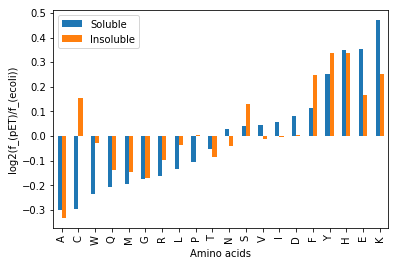

In [7]:
ax1 = pd.merge(sol_dic_log_df.reset_index(), insol_dic_log_df.reset_index(), on="index").plot.bar()
ax1.set_xticklabels(sol_dic_log_df.reset_index()['index'])
ax1.set(ylabel='log2(f_(pET)/f_(ecoli))', xlabel='Amino acids')
ax1.get_figure().savefig('figs/Aa_comparsion_ecoli_pET_log.pdf')

In [54]:
#AA count in all pET and eSOL sequences

d0 = Counter(pET['Protein'].str.cat())
pET_count = pd.DataFrame.from_dict(d0, orient='index')
pET_count[0] = pET_count[0]/pET_count[0].sum()

d01 = Counter(eSOL['Sequence'].str.cat())
eSOL_count = pd.DataFrame.from_dict(d01, orient='index')
eSOL_count[0] = eSOL_count[0]/eSOL_count[0].sum()


merged_df_counts = pd.merge(eSOL_count, pET_count, left_index=True,right_index=True)
merged_df_counts.rename(columns={'0_x':'eSOL normalised count', '0_y':'pET normalised count'}, inplace=True)

Text(0, 0.5, 'eSOL normalised count - pET normalised count')

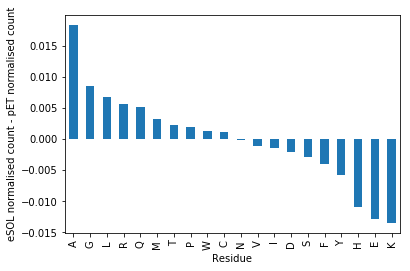

In [56]:

merged_df_counts['Delta'] = merged_df_counts['eSOL normalised count'] - merged_df_counts['pET normalised count']

ax = merged_df_counts['Delta'].sort_values(ascending=False).plot(kind='bar')
ax.set_xticklabels(merged_df_counts.sort_values(by="Delta", ascending=False).index)
ax.set_xlabel("Residue")
ax.set_ylabel("eSOL normalised count - pET normalised count")

In [58]:
merged_df_counts.sort_values(by="Delta", ascending=False)

,eSOL normalised count,pET normalised count,Delta
A,0.094465,0.076149,0.018316
G,0.076750,0.068125,0.008625
L,0.101891,0.095169,0.006722
R,0.061944,0.056307,0.005637
Q,0.043463,0.038340,0.005123
M,0.028535,0.025247,0.003288
T,0.053178,0.050834,0.002345
P,0.044812,0.042873,0.001939
W,0.013210,0.011847,0.001363
C,0.014077,0.012990,0.001087


In [65]:
##Correlation between weights and frequency of AA in pET

from scipy.stats import spearmanr

flexibilities_smith = {'A': 0.717, 'C': 0.668, 'E': 0.963, 'D': 0.921,\
                         'G': 0.843, 'F': 0.599, 'I': 0.632, 'H': 0.754, \
                         'K': 0.912, 'M': 0.685, 'L': 0.681, 'N': 0.851,\
                         'Q': 0.849, 'P': 0.85, 'S': 0.84, 'R': 0.814, 'T': 0.758, \
                         'W': 0.626, 'V': 0.619, 'Y': 0.615}

freq_ = []
for i, v in flexibilities_smith.items():
    freq_.append(pET_count.loc[i, 0])

    
weights_from_optimisation_on_pET = [0.8356471476582918,
 0.5208088354857734,
 0.9876987431418378,
 0.9079044671339564,
 0.7997168496420723,
 0.5849790194237692,
 0.6784124413866582,
 0.8947913996466419,
 0.9267104557513497,
 0.6296623675420369,
 0.6554221515081433,
 0.8597433107431216,
 0.789434648348208,
 0.8235328714705341,
 0.7440908318492778,
 0.7712466317693457,
 0.8096922697856334,
 0.6374678690957594,
 0.7357837119163659,
 0.6112801822947587]

spearmanr(weights_from_optimisation_on_pET, freq_)

SpearmanrResult(correlation=0.4917293233082706, pvalue=0.027658227513046127)

In [64]:
#Correlation between eSOl weights and frequency
freq_esol = []
for i, v in flexibilities_smith.items():
    freq_esol.append(eSOL_count.loc[i, 0])
freq_esol

weights_from_optimisation_on_eSOL = [0.7753128 , 0.75267699, 0.96855732, 0.99198437, 0.79871142,
       0.58665948, 0.65250384, 0.95981116, 0.88626844, 0.69924406,
       0.68868975, 0.79789734, 0.77431079, 0.83904596, 0.7736663 ,
       0.6864538 , 0.79759916, 0.51460814, 0.73007091, 0.53931017]

spearmanr(weights_from_optimisation_on_eSOL, freq_esol)

SpearmanrResult(correlation=0.26766917293233083, pvalue=0.2538915426582106)

In [61]:
## optimised weights have no statistically significant correlation with amino acid frequency

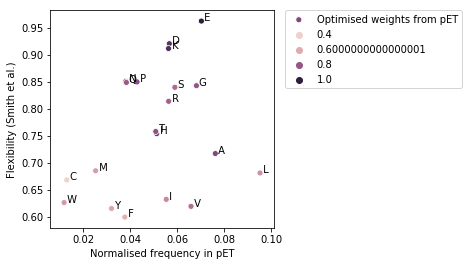

In [98]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(freq_, [v for k, v in flexibilities_smith.items()],\
                     hue=weights_from_optimisation_on_pET, label="Optimised weights from pET")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Normalised frequency in pET')
ax.set_ylabel('Flexibility (Smith et al.)')
for i, v in enumerate([k for k, v in flexibilities_smith.items()]):
    ax.annotate(' ' +v, [freq_[i], [v for k, v in flexibilities_smith.items()][i]])

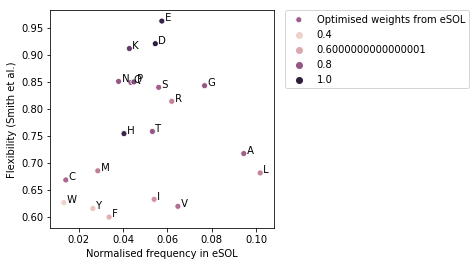

In [99]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(freq_esol, [v for k, v in flexibilities_smith.items()],\
                     hue=weights_from_optimisation_on_eSOL, label="Optimised weights from eSOL")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Normalised frequency in eSOL')
ax.set_ylabel('Flexibility (Smith et al.)')
for i, v in enumerate([k for k, v in flexibilities_smith.items()]):
    ax.annotate(' ' +v, [freq_esol[i], [v for k, v in flexibilities_smith.items()][i]])